In [1]:
import preprocess_shapenet as prep

prep.batch_process_shapenet(
    root_dir=r"L:\Recordings\2015-01 ShapeNetCore", 
    save_dir=r"C:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\data", 
    max_models=10)

Found 10 .obj files under category 03001627
Processing 10 .obj files


c:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\env\Lib\site-packages\trimesh\triangles.py:547: RuntimeWarning: divide by zero encountered in divide
  inverse_denominator = 1.0 / (dot00 * dot11 - dot01 * dot01)
c:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\env\Lib\site-packages\trimesh\triangles.py:552: RuntimeWarning: invalid value encountered in subtract
  barycentric[:, 0] = 1 - barycentric[:, 1] - barycentric[:, 2]
c:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\env\Lib\site-packages\trimesh\visual\color.py:965: RuntimeWarning: invalid value encountered in cast
  y.round().astype(np.int64) % image.height,
c:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\env\Lib\site-packages\trimesh\visual\color.py:966: RuntimeWarning: invalid value encountered in cast
  x.round().astype(np.int64) % image.width,


Failed to process L:\Recordings\2015-01 ShapeNetCore\03001627\1022fe7dd03f6a4d4d5ad9f13ac9f4e7\models\model_normalized.obj: 'NoneType' object is not subscriptable


c:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\env\Lib\site-packages\trimesh\triangles.py:550: RuntimeWarning: invalid value encountered in multiply
  barycentric[:, 2] = (dot00 * dot12 - dot01 * dot02) * inverse_denominator
c:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\env\Lib\site-packages\trimesh\triangles.py:551: RuntimeWarning: invalid value encountered in multiply
  barycentric[:, 1] = (dot11 * dot02 - dot01 * dot12) * inverse_denominator


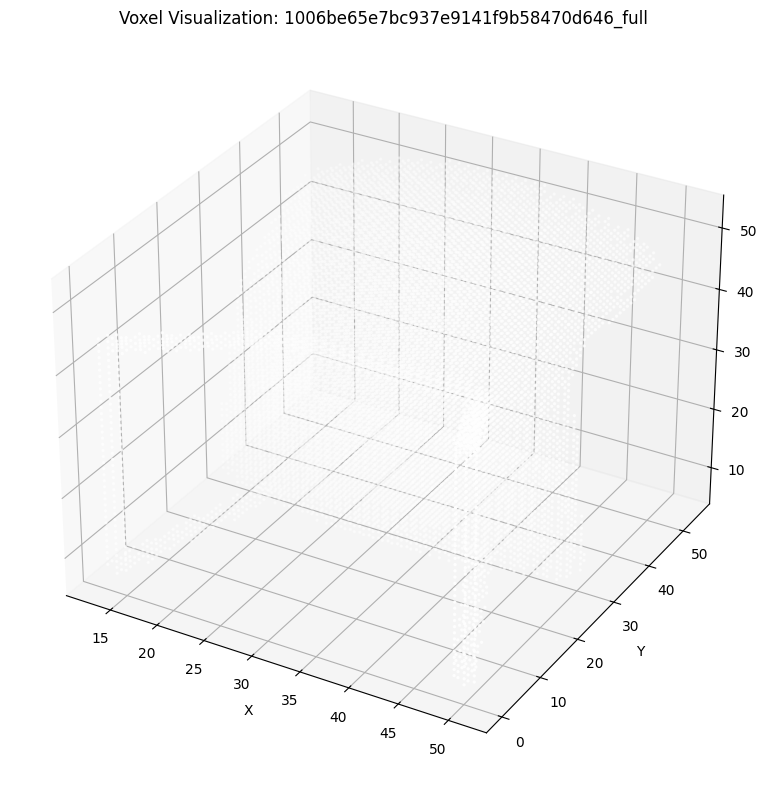

In [2]:
import preprocess_shapenet as prep
prep.visualize_voxel_tensor(r"C:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\data\1006be65e7bc937e9141f9b58470d646_full.npz")


(64, 64, 64, 3)
Generated 3D texture with gridsize:(8, 8)


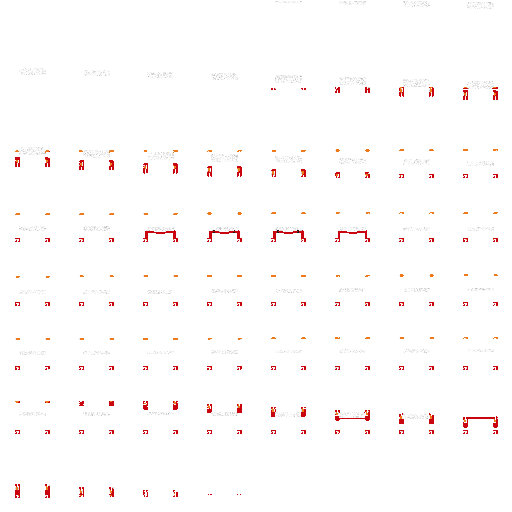

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import utils as ut


voxelResolution = 64
npz_path = r"C:\Users\jelle\Documents\DoctoraatLocal\3DTexCompNet\data\1033ee86cc8bac4390962e4fb7072b86_full.npz"
data = np.load(npz_path)['data']  # shape: (4, D, H, W)
colors = np.transpose(data[:3], (1, 2, 3, 0))  # (D, H, W, C)
print(colors.shape)
sdf = data[3]   # (D, H, W)
gridDim = int(np.ceil(np.sqrt(voxelResolution)))
#grid_size = (gridDim,gridDim)
grid_size = ut.get_closest_factors(voxelResolution)
texture = ut.create_tiled_texture(sdf, colors, grid_size)

# Save as an image
image = Image.fromarray(texture)
#image = image.transpose(Image.ROTATE_180) # rotate the image right side up
#image.save(savePath + "_color_" + str(voxelResolution)+"_" +str(grid_size) + ".png")
print("Generated 3D texture with gridsize:" + str(grid_size))
# Display the image
display(image)